# COSC 2779 Deep learning: Assignment 2


## Data Exploration & Analysis



### Data Retrieval

In [1]:
# Import Essential dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import tensorflow as tf

In [2]:
!pip install nltk

import nltk



You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
# Read train and test dataset.
with open('Data/train_shuffled.csv','r',encoding='ISO-8859-1') as f:
    train_data = pd.read_csv(f)

with open('Data/test.csv','r',encoding='ISO-8859-1') as y:
    test_data = pd.read_csv(y)
    
    
f.close()
y.close()

In [4]:
train_data.head(20)

Unnamed: 0                                              Tweet  \
0            0  IF FEMINISTS WERE HONEST   "Tell me the truth ...   
1            1  Watching teen mom and watching Farrah be a bit...   
2            2  @AssaadRazzouk @TheEarthNetwork @wynnandreid U...   
3            3  WOW.  Why is gay marriage legal but LESBIAN ma...   
4            4  RT @ProLifeYouth: "It seems to me clear as day...   
5            5  That's like being into cannibalism but against...   
6            6  Verily, verily, I say unto you, The servant is...   
7            7  Everywhere we look, moderate weather seems to ...   
8            8  I don't plan on ever having an abortion, but h...   
9            9  What are you afraid of @HillaryClinton? If you...   
10          10  those who resist against feminism before us 20...   
11          11  If the sexes had equal intellectual abilities ...   
12          12  @HillaryClinton So what's your goal for settin...   
13          13  @kbambi1376 It's not a conscious choice that's...   
14          14  I get the whole "Kill your darlings" advice, b...   
15          15  Assaulting & manipulating pregnant people does...   
16          16  Murdering an unborn child is the crudest form ...   
17          17  Religion lies on a collective apophenia, but y...   
18          18  I am 1 in 3... I have had an abortion #Abortio...   
19          19  They made same sex marriage legal but they won...   

                              Target   Stance  \
0                  Feminist Movement  AGAINST   
1           Legalization of Abortion    FAVOR   
2   Climate Change is a Real Concern     NONE   
3                  Feminist Movement     NONE   
4           Legalization of Abortion  AGAINST   
5           Legalization of Abortion  AGAINST   
6                            Atheism  AGAINST   
7   Climate Change is a Real Concern    FAVOR   
8           Legalization of Abortion    FAVOR   
9                    Hillary Clinton  AGAINST   
10                 Feminist Movement    FAVOR   
11                 Feminist Movement  AGAINST   
12                   Hillary Clinton  AGAINST   
13                 Feminist Movement  AGAINST   
14          Legalization of Abortion  AGAINST   
15          Legalization of Abortion    FAVOR   
16          Legalization of Abortion  AGAINST   
17                           Atheism    FAVOR   
18          Legalization of Abortion  AGAINST   
19          Legalization of Abortion  AGAINST   

                                      Opinion Towards Sentiment  
0   1.  The tweet explicitly expresses opinion abo...       neg  
1   1.  The tweet explicitly expresses opinion abo...       neg  
2   2. The tweet does NOT expresses opinion about ...       neg  
3   2. The tweet does NOT expresses opinion about ...       neg  
4   1.  The tweet explicitly expresses opinion abo...       neg  
5   1.  The tweet explicitly expresses opinion abo...       neg  
6   2. The tweet does NOT expresses opinion about ...       neg  
7   1.  The tweet explicitly expresses opinion abo...       neg  
8   1.  The tweet explicitly expresses opinion abo...       neg  
9   1.  The tweet explicitly expresses opinion abo...       neg  
10  1.  The tweet explicitly expresses opinion abo...       neg  
11  1.  The tweet explicitly expresses opinion abo...       neg  
12  1.  The tweet explicitly expresses opinion abo...       neg  
13  1.  The tweet explicitly expresses opinion abo...       neg  
14  1.  The tweet explicitly expresses opinion abo...       neg  
15  1.  The tweet explicitly expresses opinion abo...       neg  
16  1.  The tweet explicitly expresses opinion abo...       neg  
17  1.  The tweet explicitly expresses opinion abo...       neg  
18  2. The tweet does NOT expresses opinion about ...     other  
19  1.  The tweet explicitly expresses opinion abo...       neg

In [5]:
test_data.head(20)
    

Tweet   Target   Stance  \
0   He who exalts himself shall      be humbled; a...  Atheism  AGAINST   
1   RT @prayerbullets: I remove Nehushtan -previou...  Atheism  AGAINST   
2   @Brainman365 @heidtjj @BenjaminLives I have so...  Atheism  AGAINST   
3   #God is utterly powerless without Human interv...  Atheism  AGAINST   
4   @David_Cameron   Miracles of #Multiculturalism...  Atheism  AGAINST   
5   This world needs a tight group hug. Tight enou...  Atheism  AGAINST   
6   Morality is not derived from religion, it prec...  Atheism  AGAINST   
7   A Godly husband  - knows you - trusts you - lo...  Atheism  AGAINST   
8   @SecularDutchess I'll be your huckleberry @Dea...  Atheism  AGAINST   
9   #BIBLE = Big Irrelevant Book of Lies and Exagg...  Atheism  AGAINST   
10  If only dreams were real, now it's gone. #Sing...  Atheism  AGAINST   
11  Happy Independence Day to America and her beau...  Atheism  AGAINST   
12  Let my house be built by wisdom and become str...  Atheism  AGAINST   
13  These days, the cool kids are atheists.  #free...  Atheism  AGAINST   
14  Next time you hear someone say that our Foundi...  Atheism  AGAINST   
15  #ILoveIslamBecause and v should love Islam bec...  Atheism  AGAINST   
16  Be a sinner and sin strongly, but more strongl...  Atheism  AGAINST   
17  #God > My fears God > My insecurities God > My...  Atheism  AGAINST   
18  Mary, Queen of martyrs, pray for us. #Catholic...  Atheism  AGAINST   
19  America, like all of us, has both beauty and b...  Atheism  AGAINST   

                                      Opinion Towards Sentiment  
0   1.  The tweet explicitly expresses opinion abo...       pos  
1   1.  The tweet explicitly expresses opinion abo...     other  
2   1.  The tweet explicitly expresses opinion abo...       pos  
3   1.  The tweet explicitly expresses opinion abo...       neg  
4   2. The tweet does NOT expresses opinion about ...       neg  
5   1.  The tweet explicitly expresses opinion abo...       pos  
6   1.  The tweet explicitly expresses opinion abo...       pos  
7   1.  The tweet explicitly expresses opinion abo...       pos  
8   2. The tweet does NOT expresses opinion about ...     other  
9   1.  The tweet explicitly expresses opinion abo...       neg  
10  2. The tweet does NOT expresses opinion about ...       neg  
11  2. The tweet does NOT expresses opinion about ...       pos  
12  1.  The tweet explicitly expresses opinion abo...       pos  
13  1.  The tweet explicitly expresses opinion abo...       pos  
14  1.  The tweet explicitly expresses opinion abo...       neg  
15  1.  The tweet explicitly expresses opinion abo...       pos  
16  1.  The tweet explicitly expresses opinion abo...       pos  
17  1.  The tweet explicitly expresses opinion abo...       pos  
18  1.  The tweet explicitly expresses opinion abo...       pos  
19  2. The tweet does NOT expresses opinion about ...       neg

In [6]:

def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText


# train_data['Tweet'] = preprocess(train_data['Tweet'])

In [7]:
train_data['Tweet']

0       IF FEMINISTS WERE HONEST   "Tell me the truth ...
1       Watching teen mom and watching Farrah be a bit...
2       @AssaadRazzouk @TheEarthNetwork @wynnandreid U...
3       WOW.  Why is gay marriage legal but LESBIAN ma...
4       RT @ProLifeYouth: "It seems to me clear as day...
                              ...                        
2909    @FoxNews we just have to hang in there long en...
2910    #BeautyRant 7-Why have I been taught to hate m...
2911    We are thrilled to announce that we will be op...
2912     There use to be a glacier on the equator. #SemST
2913    When did people without taste buds decide to b...
Name: Tweet, Length: 2914, dtype: object

In [8]:

# Number of Stance
train_data['Stance'].unique()


array(['AGAINST', 'FAVOR', 'NONE'], dtype=object)

In [9]:

# Number of Target Topic
train_data['Target'].unique()

array(['Feminist Movement', 'Legalization of Abortion',
       'Climate Change is a Real Concern', 'Atheism', 'Hillary Clinton'],
      dtype=object)

### Observe Stance Distribution for each target topic

In [10]:
import seaborn as sns

def plotTopicDist(TARGET_TOPIC):
  index = 0

  counter = [0,0,0]


  for topic in train_data['Target']:
    if topic == TARGET_TOPIC:
      y = 0
      for stance in train_data['Stance'].unique():
        if stance == train_data['Stance'][index]:
          counter[y] += 1
        y+=1


    index+=1

  df = pd.DataFrame([{'x':'AGAINST','y':counter[0]},{'x':'FAVOUR','y':counter[1]},{'x':'NONE','y':counter[2]}])
  sns.barplot(x = 'x',
              y = 'y',
              data = df)

  plt.title("TARGET TOPIC: "+str(TARGET_TOPIC))

  plt.show()

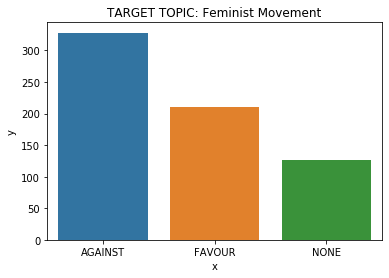

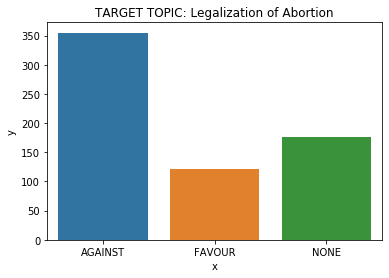

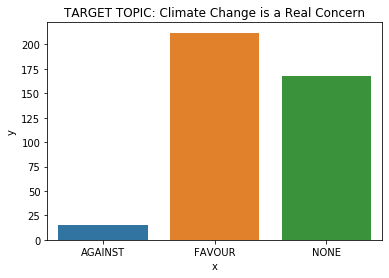

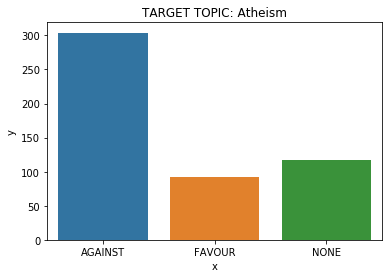

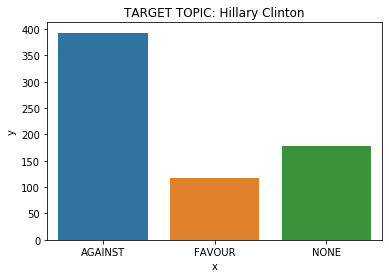

In [11]:
# Observe all topic distributions

for topic in train_data['Target'].unique():
  plotTopicDist(topic)

### Visualizations of word distribution in Tweets

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
'''
top_N=20

txt = train_data['Tweet'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

plt.style.use('ggplot')

plt.figure(figsize=(40,20))
rslt.plot.bar(rot=0)

plt.xticks(rotation=75)
'''

"\ntop_N=20\n\ntxt = train_data['Tweet'].str.lower().str.replace(r'\\|', ' ').str.cat(sep=' ')\nwords = nltk.tokenize.word_tokenize(txt)\nword_dist = nltk.FreqDist(words)\n\nstopwords = nltk.corpus.stopwords.words('english')\nwords_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) \n\nprint('All frequencies, including STOPWORDS:')\nprint('=' * 60)\nrslt = pd.DataFrame(word_dist.most_common(top_N),\n                    columns=['Word', 'Frequency'])\nprint(rslt)\nprint('=' * 60)\n\nrslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),\n                    columns=['Word', 'Frequency']).set_index('Word')\n\nplt.style.use('ggplot')\n\nplt.figure(figsize=(40,20))\nrslt.plot.bar(rot=0)\n\nplt.xticks(rotation=75)\n"

### Word Cloud (Train Data)

In [14]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

def visualizeWordCloud(data):
  tweet_All = " ".join(review for review in data)

  plt.figure(figsize  = (30,30))
  # Create and generate a word cloud image:
  wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

  # Display the generated image:
  plt.imshow(wordcloud_ALL, interpolation='bilinear')
  plt.title('All Tweets', fontsize=30)
  plt.axis('off')


You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


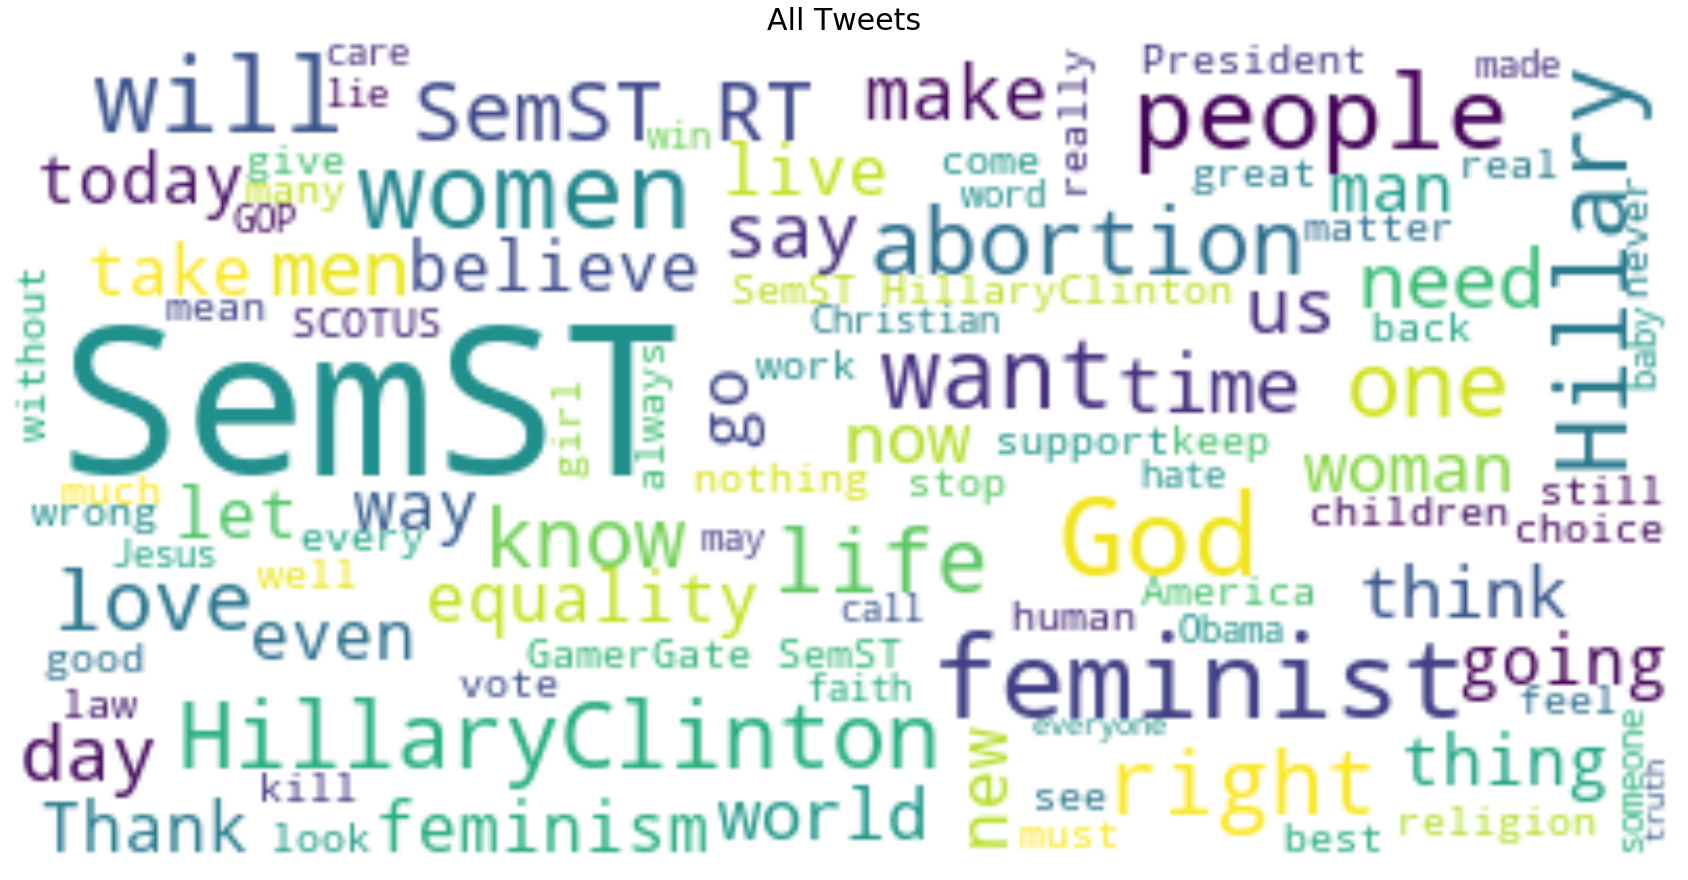

In [15]:
visualizeWordCloud(train_data['Tweet'])

### Word Cloud (Test Data)

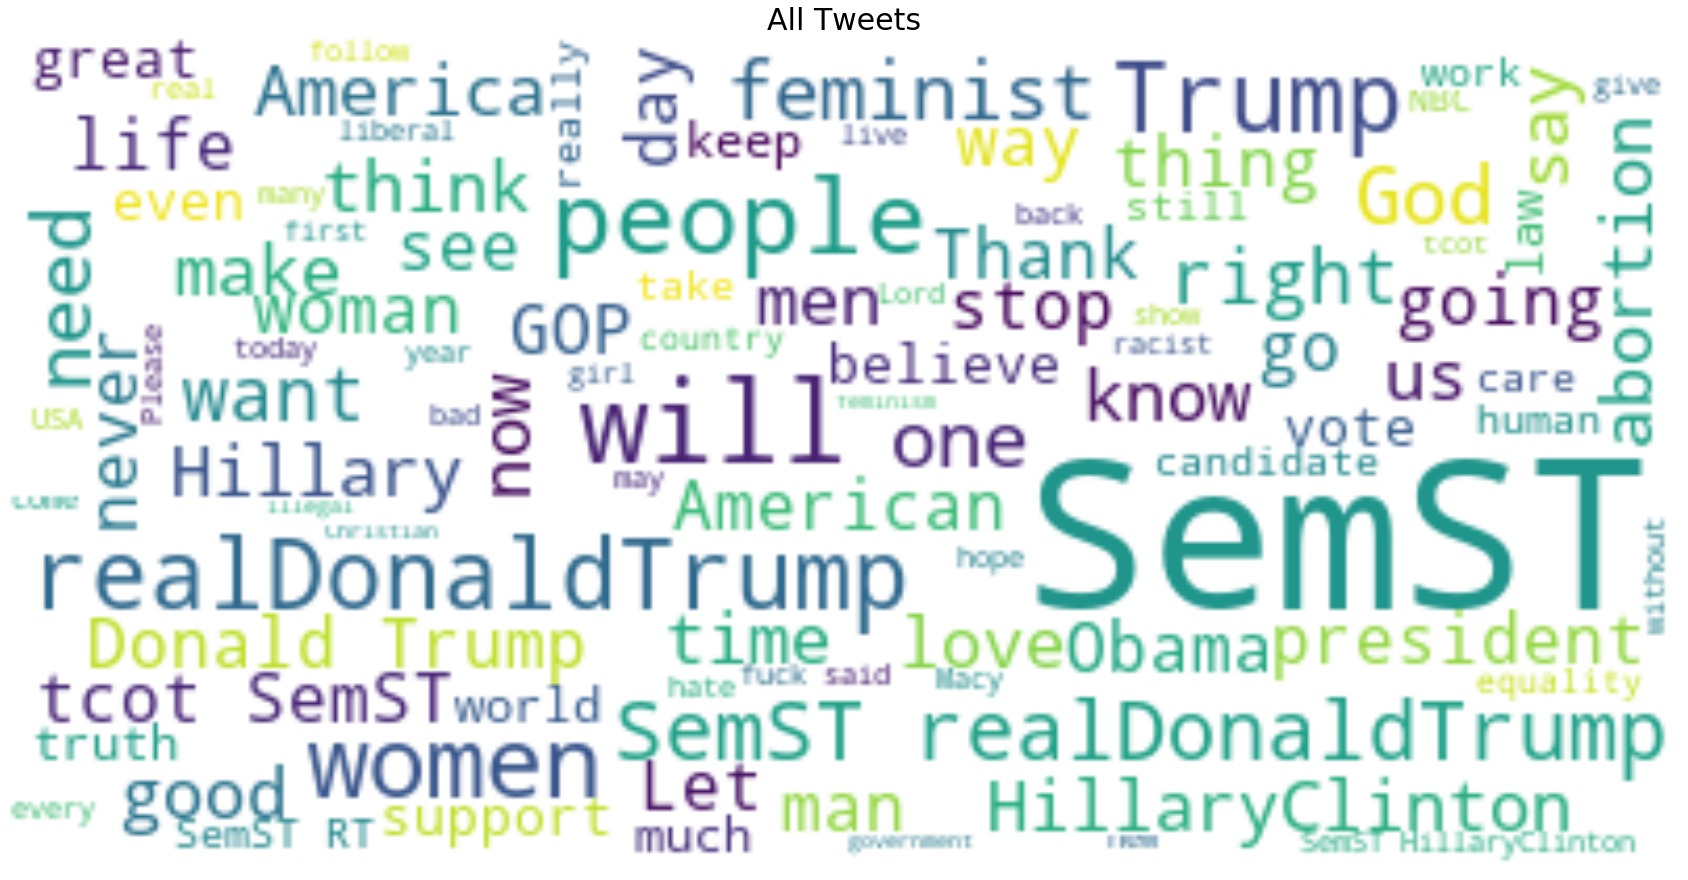

In [16]:
visualizeWordCloud(test_data['Tweet'])

### Topic Specific WordCloud

**Hillary Clinton**

In [17]:
def visualizeTopicWordCloud(TARGET_TOPIC):
  topicBool = train_data['Target'] == TARGET_TOPIC
  topic = train_data[topicBool]

  visualizeWordCloud(topic['Tweet'])

**Hillary Clinton**

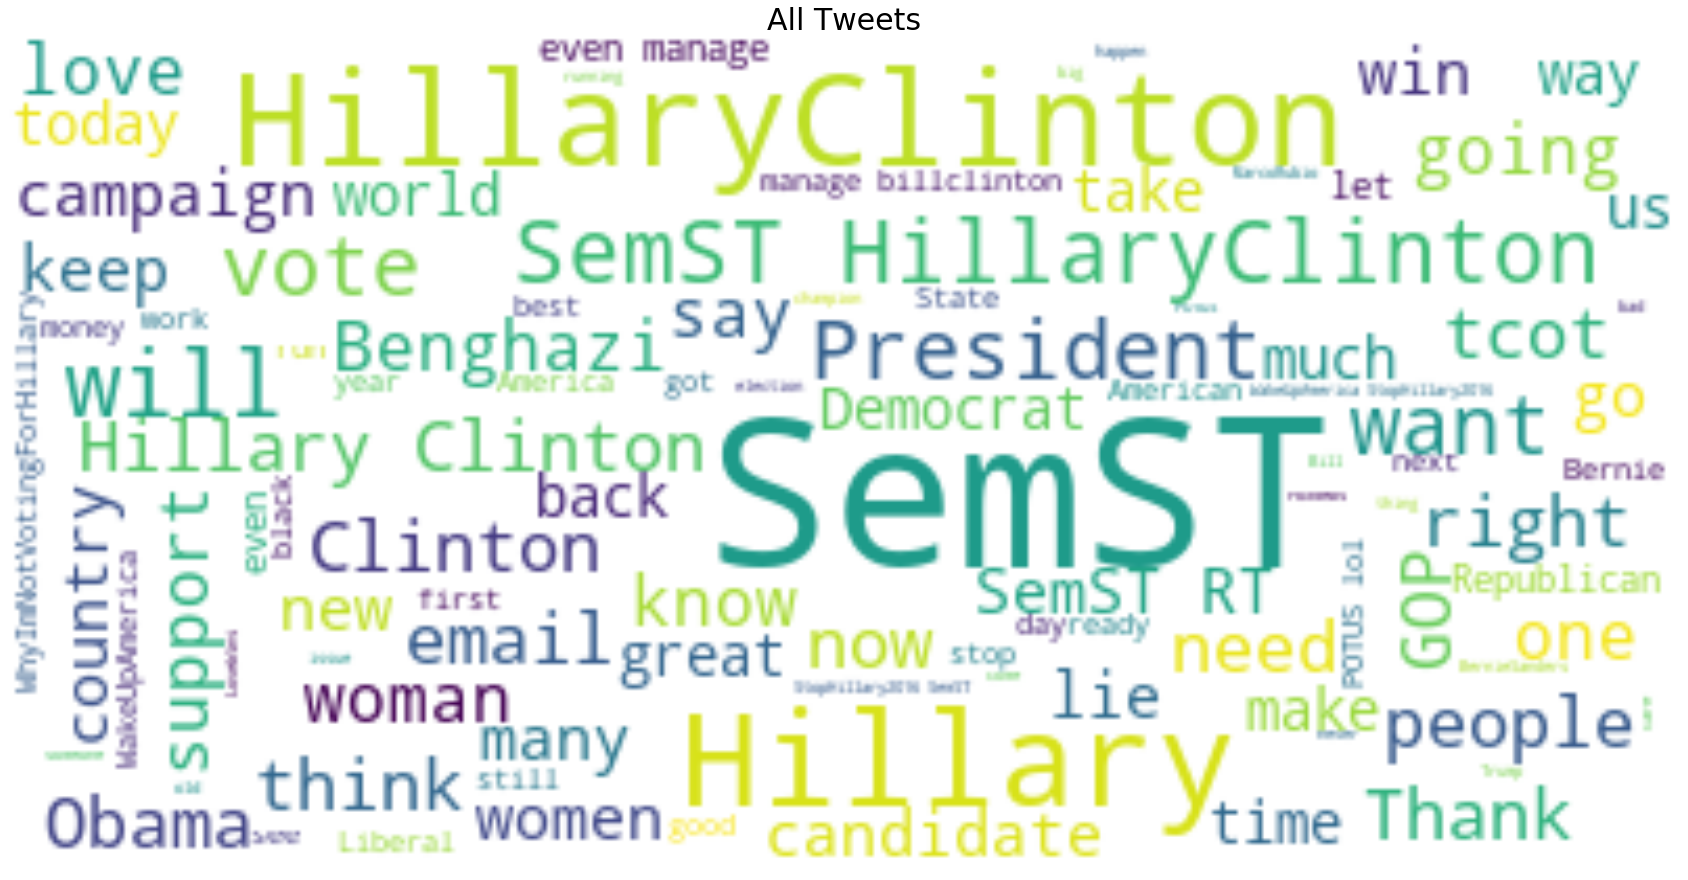

In [18]:
visualizeTopicWordCloud("Hillary Clinton")

**Legalization of Abortion**

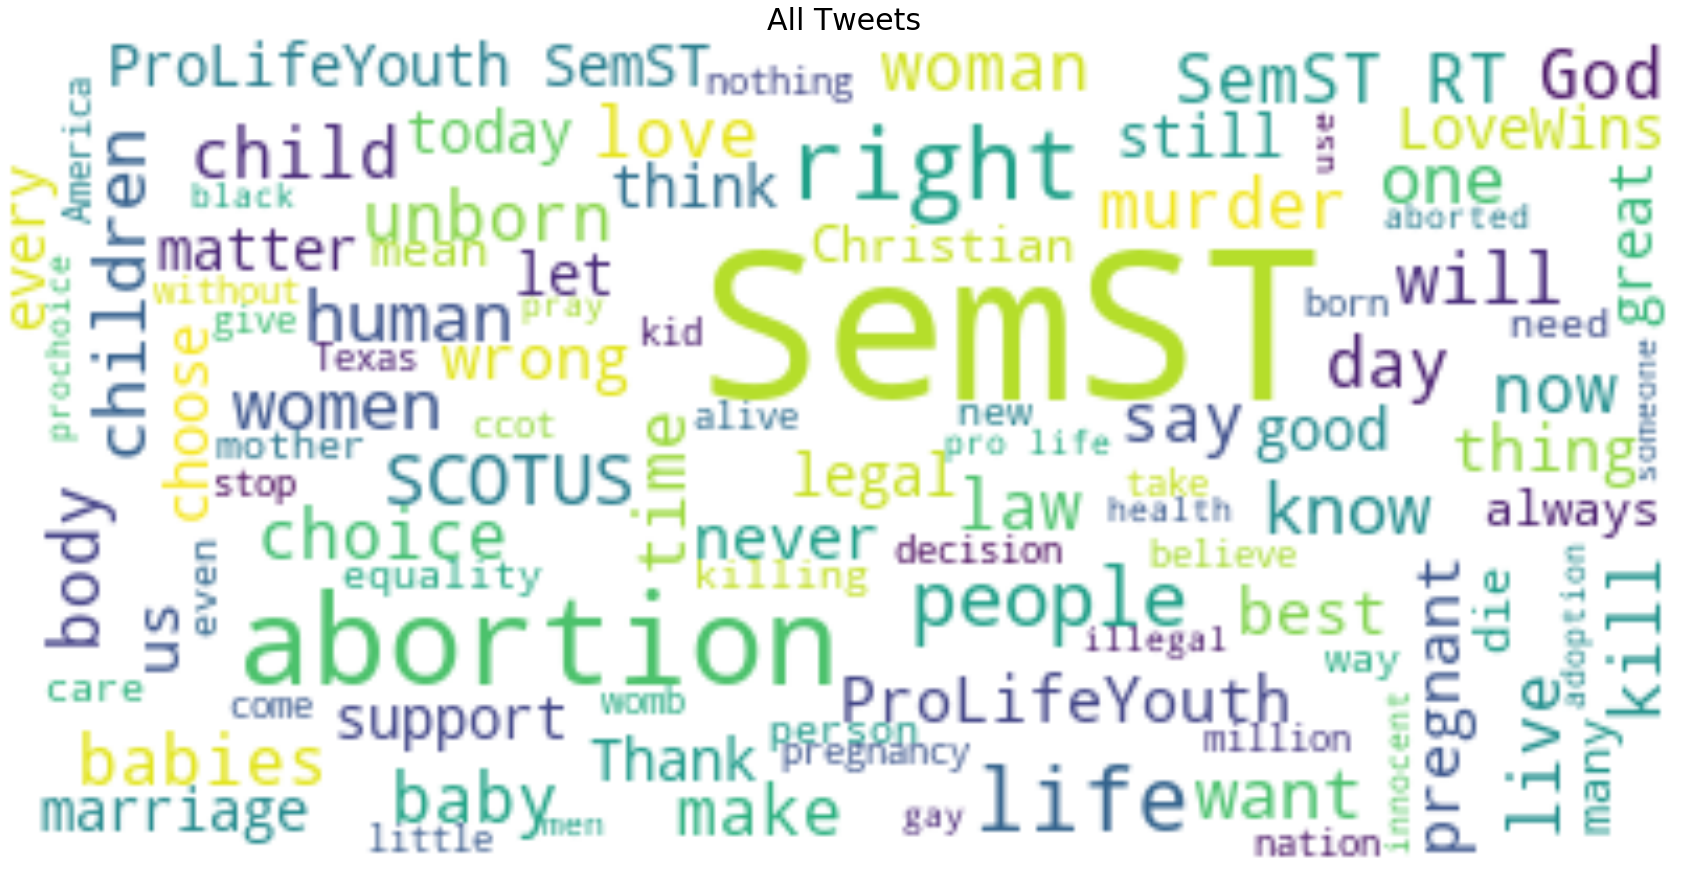

In [19]:
visualizeTopicWordCloud('Legalization of Abortion')

**Atheism**

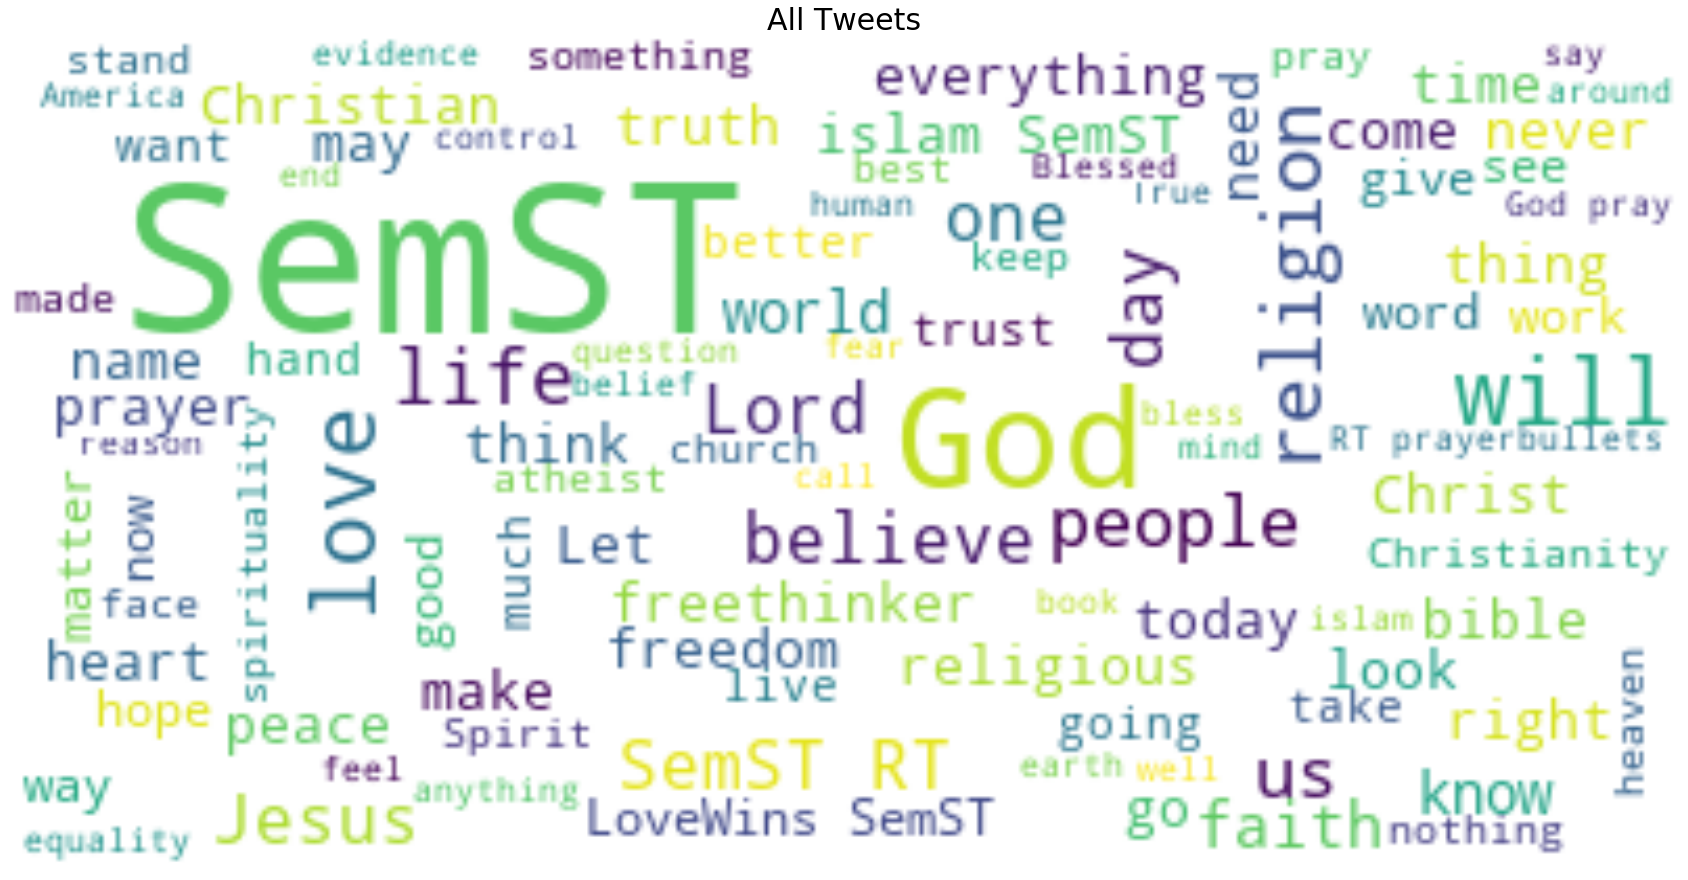

In [20]:
visualizeTopicWordCloud('Atheism')

**Climate Change is a Real Concern**

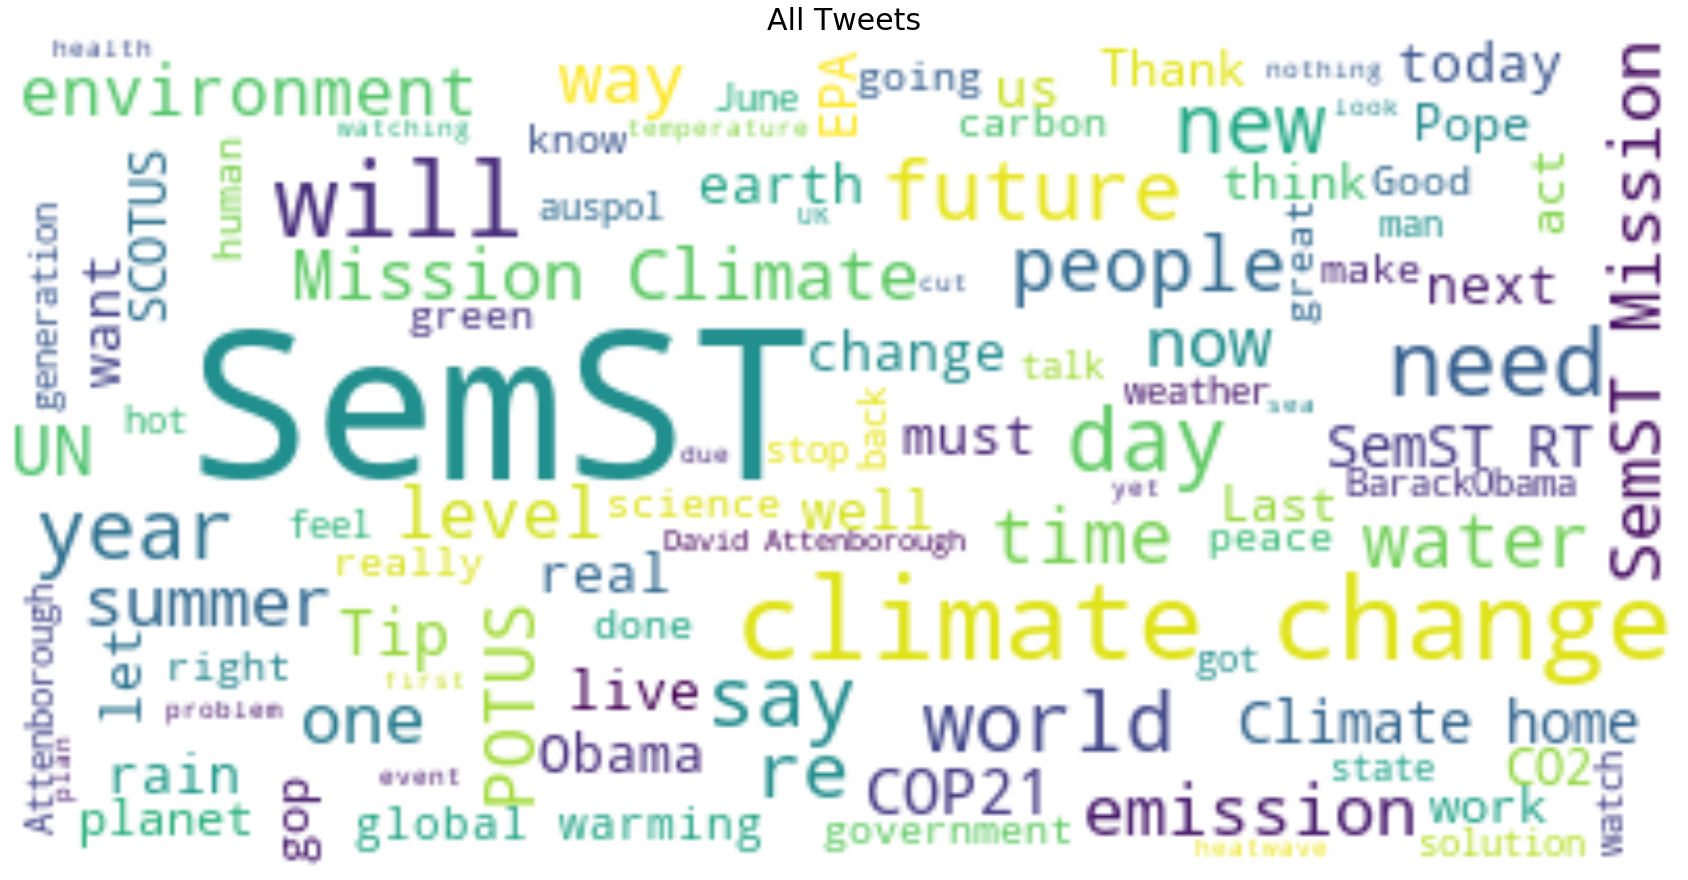

In [21]:
visualizeTopicWordCloud('Climate Change is a Real Concern')

**Feminist Movement**

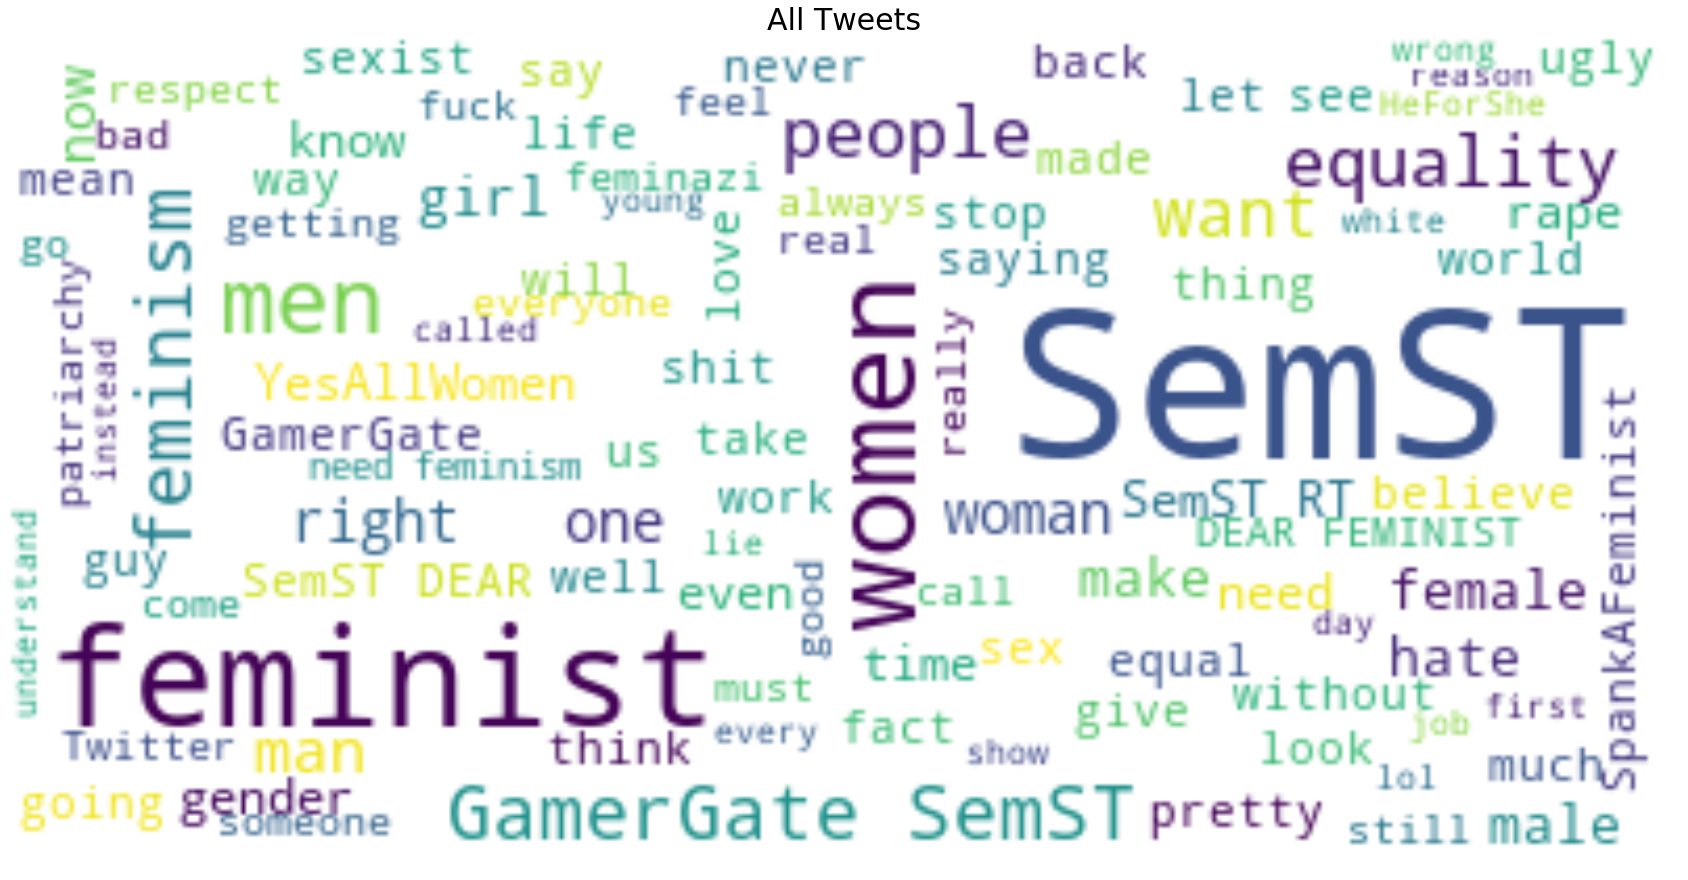

In [22]:
visualizeTopicWordCloud('Feminist Movement')

## Data Preparation

### Preparing Input & Target (x/y) values 

In [23]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

tweet_lines = list()
lines = train_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    # Append lines to calculate max length
    lines_length.append(len(tokens))

    # Append pre-processed tokens
    tweet_lines.append(tokens)

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
tweet_lines[:2]

[['if',
  'feminists',
  'were',
  'honest',
  'tell',
  'me',
  'the',
  'truth',
  'but',
  'make',
  'sure',
  'you',
  'agree',
  'with',
  'me',
  'gamergate',
  'semst'],
 ['watching',
  'teen',
  'mom',
  'and',
  'watching',
  'farrah',
  'be',
  'a',
  'bitch',
  'makes',
  'me',
  'believe',
  'in',
  'abortion',
  'that',
  'much',
  'more',
  'semst']]

In [25]:
max_length=max(lines_length)

max_length

33

In [26]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [27]:
tweet_lines_pad[:5]

array([[  25,   75,  134,  528,  285,   35,    2,  227,   38,   89,  386,
           8,  311,   23,   35,  104,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 387, 1237,  529,    9,  387, 3399,   15,    4,  579,  329,   35,
         121,   10,   61,   16,  124,   63,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [3400, 3401, 3402,  286,    6, 1023,  530,    3, 3403,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 484,   65,    6,  242,  141,  312,   38, 2100,  141,  243,   14,
          32,    2,  367,  150,  889,   27,   70,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  53,  163,   13,  580,    3,   35,  773,   33, 3404,   16,   61,
          87,   15,    4,  531, 34

In [28]:
train_data['Target'][:5]

0                   Feminist Movement
1            Legalization of Abortion
2    Climate Change is a Real Concern
3                   Feminist Movement
4            Legalization of Abortion
Name: Target, dtype: object

In [29]:

target_lines = list()
lines = train_data['Target'].values.tolist()

target_lines_length = list()
for line in lines:
    # tokenize the text
    tokens = word_tokenize(line)

    target_lines_length.append(len(tokens))

    target_lines.append(tokens)

In [30]:
target_max_length=max(target_lines_length)

target_max_length

6

In [31]:

sequences = tokenizer_obj.texts_to_sequences(target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [32]:
target_lines_pad[:5]

array([[  76,  930,    0,    0,    0,    0],
       [8784,    5,   61,    0,    0,    0],
       [ 119,  108,    6,    4,  184, 6153],
       [  76,  930,    0,    0,    0,    0],
       [8784,    5,   61,    0,    0,    0]], dtype=int32)

In [33]:
print("Tweet Lines Shape", tweet_lines_pad.shape)
print("Target Lines Shape", target_lines_pad.shape)


Tweet Lines Shape (2914, 33)
Target Lines Shape (2914, 6)


In [34]:
from keras import utils as np_utils

stance_list = []

for value in train_data['Stance']:
  if value == "FAVOR":
    stance_list.append(0)
  elif value == "NONE":
    stance_list.append(1)
  elif value == "AGAINST":
    stance_list.append(2)


stance_list = np_utils.to_categorical(stance_list)

Using TensorFlow backend.


In [35]:

print("Tweet x Shape", tweet_lines_pad.shape )
print("Target x Shape", target_lines_pad.shape)
print("Stance y Shape", stance_list.shape)

Tweet x Shape (2914, 33)
Target x Shape (2914, 6)
Stance y Shape (2914, 3)


### Preparing Test Dataset

In [55]:
# Removing Donald Trump Target Topic
test_data = test_data[test_data['Target'] != "Donald Trump"]

In [56]:

test_tweet_lines = list()
lines = test_data['Tweet'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    
    lines_length.append(len(tokens))

    test_tweet_lines.append(tokens)

In [57]:
sequences = tokenizer_obj.texts_to_sequences(test_tweet_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

test_tweet_lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [ ]:
# Check unique Target values for test data
test_data['Target'].unique()

In [59]:
test_target_lines = list()
lines = test_data['Target'].values.tolist()

lines_length = list()
for line in lines:
    # Remove Punctuation except @ and #
    line = ' '.join(re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', line).split())
    
    # tokenize the text
    tokens = word_tokenize(line)  
   
    # convert to lower case
    tokens = [w.lower() for w in tokens]

    lines_length.append(len(tokens))

    test_target_lines.append(tokens)

In [60]:
sequences = tokenizer_obj.texts_to_sequences(test_target_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - "+str(len(word_index)))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab_size - '+str(vocab_size))

test_target_lines_pad = pad_sequences(sequences, maxlen=target_max_length, padding='post')

unique tokens - 9244
vocab_size - 9245


In [62]:
test_stance_list = []

for value in test_data['Stance']:
  if value == "FAVOR":
    test_stance_list.append(0)
  elif value == "NONE":
    test_stance_list.append(1)
  elif value == "AGAINST":
    test_stance_list.append(2)

test_stance_list = np_utils.to_categorical(test_stance_list)

In [63]:
print("Test Tweets Shape", test_tweet_lines_pad.shape)
print("Test Targets Shape",test_target_lines_pad.shape)
print("Test Stance Shape",test_stance_list.shape)

Test Tweets Shape (1249, 33)
Test Targets Shape (1249, 6)
Test Stance Shape (1249, 3)


In [130]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
    
def getTestAccuracy(model):
    y_pred = model.predict([ test_tweet_lines_pad, test_target_lines_pad])
    
    y_pred_max = np.argmax(y_pred, axis=1)
    test_stance_list_max= np.argmax(test_stance_list, axis=1)

    return str("{:.2f}".format(accuracy_score(test_stance_list_max, y_pred_max) * 100))+"%"

### Importing GloVe Twitter Embedding Vector

In [36]:
!ls

Data  Deep_Learning_Assignment_2.ipynb	README.md


In [37]:
# Import Preloaded Embedding Vectors.
E_T_25d = np.loadtxt("Data/glove.twitter.25d.preloaded.txt")
E_T_100d = np.loadtxt("Data/glove.twitter.100d.preloaded.txt")
E_T_200d = np.loadtxt("Data/glove.twitter.200d.preloaded.txt")

In [38]:
print("25d preloaded vector shape:", E_T_25d.shape)
print("100d preloaded vector shape:", E_T_100d.shape)
print("200d preloaded vector shape:", E_T_200d.shape)

25d preloaded vector shape: (9245, 25)
100d preloaded vector shape: (9245, 100)
200d preloaded vector shape: (9245, 200)


### Prepare Visualization Tools

In [81]:
from itertools import cycle
def plotter(history_hold, metric = 'loss', ylim=[0.0, 1.0]):
  cycol = cycle('bgrcmk')
  for name, item in history_hold.items():
    y_train = item.history[metric]
    y_val = item.history['val_' + metric]
    x_train = np.arange(0,len(y_val))

    c=next(cycol)

    plt.plot(x_train, y_train, c+'-', label=name+'_train')
    plt.plot(x_train, y_val, c+'--', label=name+'_val')

  plt.legend()
  plt.xlim([1, max(plt.xlim())])
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel(metric)
  plt.grid(True)

In [82]:
# plot the evolution of Loss and Acuracy on the train and validation sets
import matplotlib.pyplot as plt

def plotter_single(history):
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.show()

## Model #1: Multi-input RNN Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional,Input, Multiply, Concatenate

from tensorflow.keras import regularizers
from tensorflow.keras import Model
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential

import tensorflow.keras.backend as K

from tensorflow.keras import initializers
from tensorflow.keras.layers import BatchNormalization

In [67]:
def tiny_model(embedding_dim = 25, E_T = E_T_25d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Bidirectional(LSTM(x_RNN_dim, return_sequences=False))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Bidirectional(LSTM(y_RNN_dim, return_sequences=False))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = Multiply()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu")(combined)
  
  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [68]:
tiny_model_train = tiny_model()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 2
SHUFFLE = True

history = tiny_model_train.fit(
                  x=[tweet_lines_pad,target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE)

Epoch 1/50
73/73 - 3s - loss: 1.0170 - accuracy: 0.5191 - val_loss: 0.9634 - val_accuracy: 0.5489
Epoch 2/50
73/73 - 1s - loss: 0.9603 - accuracy: 0.5470 - val_loss: 0.9360 - val_accuracy: 0.5592
Epoch 3/50
73/73 - 1s - loss: 0.9389 - accuracy: 0.5676 - val_loss: 0.9227 - val_accuracy: 0.5592
Epoch 4/50
73/73 - 1s - loss: 0.9198 - accuracy: 0.5834 - val_loss: 0.9147 - val_accuracy: 0.5729
Epoch 5/50
73/73 - 1s - loss: 0.8969 - accuracy: 0.5937 - val_loss: 0.9237 - val_accuracy: 0.5815
Epoch 6/50
73/73 - 1s - loss: 0.8743 - accuracy: 0.6010 - val_loss: 0.8969 - val_accuracy: 0.5969
Epoch 7/50
73/73 - 1s - loss: 0.8558 - accuracy: 0.6096 - val_loss: 0.8963 - val_accuracy: 0.6003
Epoch 8/50
73/73 - 1s - loss: 0.8126 - accuracy: 0.6293 - val_loss: 0.9055 - val_accuracy: 0.6003
Epoch 9/50
73/73 - 1s - loss: 0.7937 - accuracy: 0.6474 - val_loss: 0.9002 - val_accuracy: 0.6089
Epoch 10/50
73/73 - 1s - loss: 0.7624 - accuracy: 0.6645 - val_loss: 0.8975 - val_accuracy: 0.6175
Epoch 11/50
73/73 -

In [76]:
# Tiny Model Test Accuracy
getTestAccuracy(tiny_model_train)

'56.29%'

### Simple model with 25-dimensional embedding vector

In [78]:
def tiny_model_with_reg(embedding_dim = 25, dropout_rate = 0.4, lambda_val = 1e-4, E_T=E_T_25d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = Bidirectional(LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)

  x = Model(inputs=inputTweet, outputs=x)

  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)

  y = Model(inputs=inputTarget, outputs=y)

  ##########################
  # Merging of Branches
  ##########################

  # combine the output of the two branches (with Multiplication)
  combined = tf.keras.layers.Multiply()([x.output, y.output])



  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(combined)

  z = Dropout(dropout_rate)(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[x.input, y.input], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [79]:
tiny_model_with_reg_train = tiny_model_with_reg()

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 50
BATCH_SIZE = 32
VERBOSE = 2
SHUFFLE = True

history_tiny_model_with_reg = tiny_model_with_reg_train.fit(
                              x=[tweet_lines_pad,target_lines_pad],
                              y=stance_list,
                              validation_split=VAL_SPLIT,
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE,
                              verbose=VERBOSE,
                              shuffle=SHUFFLE)

Epoch 1/50
73/73 - 4s - loss: 1.0899 - accuracy: 0.4663 - val_loss: 1.0038 - val_accuracy: 0.5523
Epoch 2/50
73/73 - 3s - loss: 1.0098 - accuracy: 0.5393 - val_loss: 0.9894 - val_accuracy: 0.5403
Epoch 3/50
73/73 - 3s - loss: 0.9980 - accuracy: 0.5448 - val_loss: 0.9704 - val_accuracy: 0.5523
Epoch 4/50
73/73 - 3s - loss: 0.9881 - accuracy: 0.5363 - val_loss: 0.9646 - val_accuracy: 0.5506
Epoch 5/50
73/73 - 3s - loss: 0.9821 - accuracy: 0.5354 - val_loss: 0.9588 - val_accuracy: 0.5540
Epoch 6/50
73/73 - 3s - loss: 0.9830 - accuracy: 0.5427 - val_loss: 0.9657 - val_accuracy: 0.5557
Epoch 7/50
73/73 - 3s - loss: 0.9791 - accuracy: 0.5457 - val_loss: 0.9570 - val_accuracy: 0.5557
Epoch 8/50
73/73 - 3s - loss: 0.9648 - accuracy: 0.5474 - val_loss: 0.9584 - val_accuracy: 0.5557
Epoch 9/50
73/73 - 3s - loss: 0.9649 - accuracy: 0.5560 - val_loss: 0.9522 - val_accuracy: 0.5575
Epoch 10/50
73/73 - 3s - loss: 0.9599 - accuracy: 0.5534 - val_loss: 0.9492 - val_accuracy: 0.5575
Epoch 11/50
73/73 -

In [80]:
getTestAccuracy(tiny_model_with_reg_train)

'61.65%'

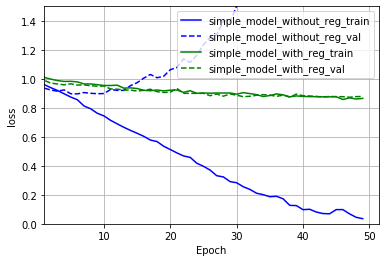

In [91]:
histories = {}

histories["simple_model_without_reg"] = history
histories["simple_model_with_reg"] = history_tiny_model_with_reg
plotter(histories, ylim=[0.0,1.5])

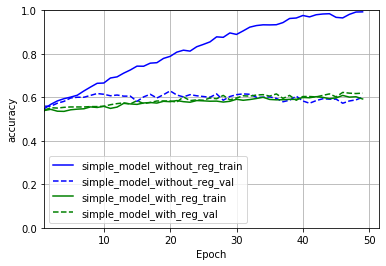

In [92]:
histories = {}

histories["simple_model_without_reg"] = history
histories["simple_model_with_reg"] = history_tiny_model_with_reg
plotter(histories,metric="accuracy", ylim=[0.0,1.0])

### Simple model with 100-dimensional embedding vector

In [86]:
tiny_model_with_reg_100d_train = tiny_model_with_reg(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.2
EPOCHS = 30
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

history_tiny_model_with_reg_100d = tiny_model_with_reg_100d_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE)

Epoch 1/30
73/73 [==============================] - 6s 77ms/step - loss: 1.0984 - accuracy: 0.4736 - val_loss: 1.0479 - val_accuracy: 0.5232
Epoch 2/30
73/73 [==============================] - 4s 54ms/step - loss: 1.0173 - accuracy: 0.5431 - val_loss: 0.9991 - val_accuracy: 0.5232
Epoch 3/30
73/73 [==============================] - 4s 53ms/step - loss: 1.0115 - accuracy: 0.5410 - val_loss: 0.9888 - val_accuracy: 0.5352
Epoch 4/30
73/73 [==============================] - 4s 53ms/step - loss: 0.9974 - accuracy: 0.5405 - val_loss: 0.9734 - val_accuracy: 0.5609
Epoch 5/30
73/73 [==============================] - 4s 54ms/step - loss: 0.9688 - accuracy: 0.5495 - val_loss: 0.9677 - val_accuracy: 0.5575
Epoch 6/30
73/73 [==============================] - 4s 53ms/step - loss: 0.9507 - accuracy: 0.5659 - val_loss: 0.9459 - val_accuracy: 0.5660
Epoch 7/30
73/73 [==============================] - 4s 55ms/step - loss: 0.9295 - accuracy: 0.5839 - val_loss: 0.9203 - val_accuracy: 0.5901
Epoch 8/30
73

In [87]:
getTestAccuracy(tiny_model_with_reg_100d_train)

'62.53%'

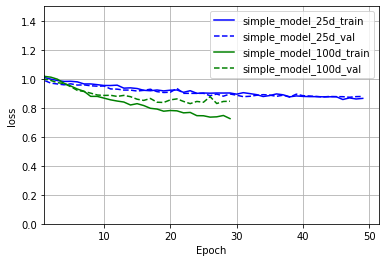

In [89]:
histories = {}

histories['simple_model_25d'] = history_tiny_model_with_reg
histories['simple_model_100d'] = history_tiny_model_with_reg_100d

plotter(histories, ylim=[0.0,1.5])

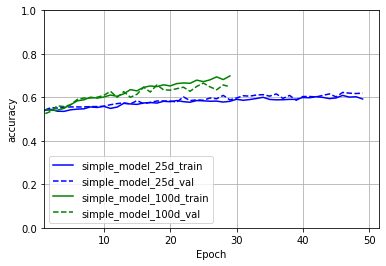

In [90]:
plotter(histories,metric="accuracy", ylim=[0.0,1.0])

## Model #2: Multi-input RNN Model with Attention Layer

Attention layer source: https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/

In [101]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [114]:
def model_with_attention(embedding_dim = 25, dropout_rate = 0.4, lambda_val = 1e-4, E_T=E_T_25d):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 32
  y_RNN_dim = 32
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input tweet)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  x = Dropout(dropout_rate)(x)

  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(x)


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  y = Dropout(dropout_rate)(y)

  y = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))(y)



  ##########################
  # Attention Layer
  ##########################
    
    
  attention_output_1 = attention()(x)
  attention_output_2 = attention()(y)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim = 64
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_output_1)

  z = Dropout(dropout_rate)(z)
    
    
  q = Dense(FC_dim, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_output_2)

  q = Dropout(dropout_rate)(q)
    
    
  ##########################
  # Merging of Streams
  ##########################
    
  combined = Concatenate()([z,q])


  finalOutput = Dense(nb_classes, activation="softmax")(combined)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet, inputTarget], outputs=finalOutput)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [116]:
model_with_attention_train = model_with_attention(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.25
EPOCHS = 80
BATCH_SIZE = 64
VERBOSE = 1
SHUFFLE = True

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_with_attention = model_with_attention_train.fit(
        x=[tweet_lines_pad,target_lines_pad],
        y=stance_list,
        validation_split=VAL_SPLIT,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        shuffle=SHUFFLE,
        callbacks=CALLBACKS)

Epoch 1/80
35/35 [==============================] - 4s 103ms/step - loss: 1.1090 - accuracy: 0.4888 - val_loss: 1.0622 - val_accuracy: 0.5514
Epoch 2/80
35/35 [==============================] - 3s 73ms/step - loss: 1.0492 - accuracy: 0.5423 - val_loss: 1.0277 - val_accuracy: 0.5514
Epoch 3/80
35/35 [==============================] - 2s 71ms/step - loss: 1.0255 - accuracy: 0.5487 - val_loss: 1.0036 - val_accuracy: 0.5514
Epoch 4/80
35/35 [==============================] - 2s 69ms/step - loss: 1.0049 - accuracy: 0.5474 - val_loss: 1.0066 - val_accuracy: 0.5501
Epoch 5/80
35/35 [==============================] - 2s 67ms/step - loss: 0.9943 - accuracy: 0.5524 - val_loss: 0.9694 - val_accuracy: 0.5583
Epoch 6/80
35/35 [==============================] - 2s 70ms/step - loss: 0.9768 - accuracy: 0.5570 - val_loss: 0.9572 - val_accuracy: 0.5789
Epoch 7/80
35/35 [==============================] - 2s 69ms/step - loss: 0.9595 - accuracy: 0.5739 - val_loss: 0.9961 - val_accuracy: 0.5652
Epoch 8/80
3

In [117]:
getTestAccuracy(model_with_attention_train)

'60.29%'

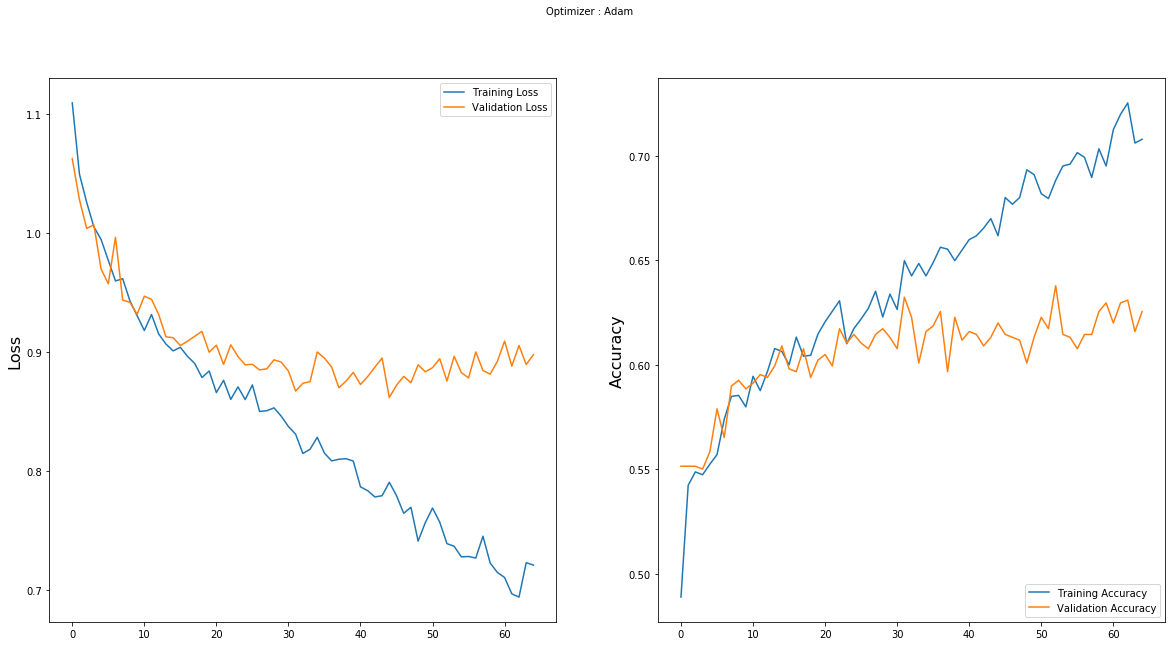

In [118]:
plotter_single(history_model_with_attention)

## Model #3: Model with Tweet input conditioned with Target input

In [129]:
def model_conditional_encoding(embedding_dim = 25, dropout_rate = 0.45, lambda_val = 0.0025, E_T=E_T_100d):
  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # Second Branch (Tweet)
  # Initalize Second Branch with First Branch encoding.
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  tweet_encoder_out = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  attention_out = attention()(tweet_encoder_out)
  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 128
  nb_classes = 3

  # apply a FC layer and then a softmax layer to predict the stance classes.


  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)

  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet,inputTarget ], outputs=z)

  
  ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.001
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  
  return model

In [124]:
model_conditional_encoding_train = model_conditional_encoding(embedding_dim=100, E_T=E_T_100d)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=10, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_conditional_encoding = model_conditional_encoding_train.fit(
                  x=[target_lines_pad,tweet_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
73/73 [==============================] - 11s 146ms/step - loss: 4.0189 - accuracy: 0.4114 - val_loss: 3.1753 - val_accuracy: 0.4700
Epoch 2/200
73/73 [==============================] - 11s 149ms/step - loss: 2.9965 - accuracy: 0.4934 - val_loss: 2.6334 - val_accuracy: 0.4700
Epoch 3/200
73/73 [==============================] - 9s 130ms/step - loss: 2.4817 - accuracy: 0.5307 - val_loss: 2.2893 - val_accuracy: 0.4700
Epoch 4/200
73/73 [==============================] - 9s 130ms/step - loss: 2.1744 - accuracy: 0.5465 - val_loss: 2.0429 - val_accuracy: 0.4854
Epoch 5/200
73/73 [==============================] - 11s 144ms/step - loss: 1.9475 - accuracy: 0.5461 - val_loss: 1.8468 - val_accuracy: 0.5317
Epoch 6/200
73/73 [==============================] - 10s 140ms/step - loss: 1.7679 - accuracy: 0.5650 - val_loss: 1.6801 - val_accuracy: 0.5609
Epoch 7/200
73/73 [==============================] - 10s 138ms/step - loss: 1.6287 - accuracy: 0.5633 - val_loss: 1.5432 - val_accuracy: 0

In [127]:
getTestAccuracy(model_conditional_encoding_train)

'61.41%'

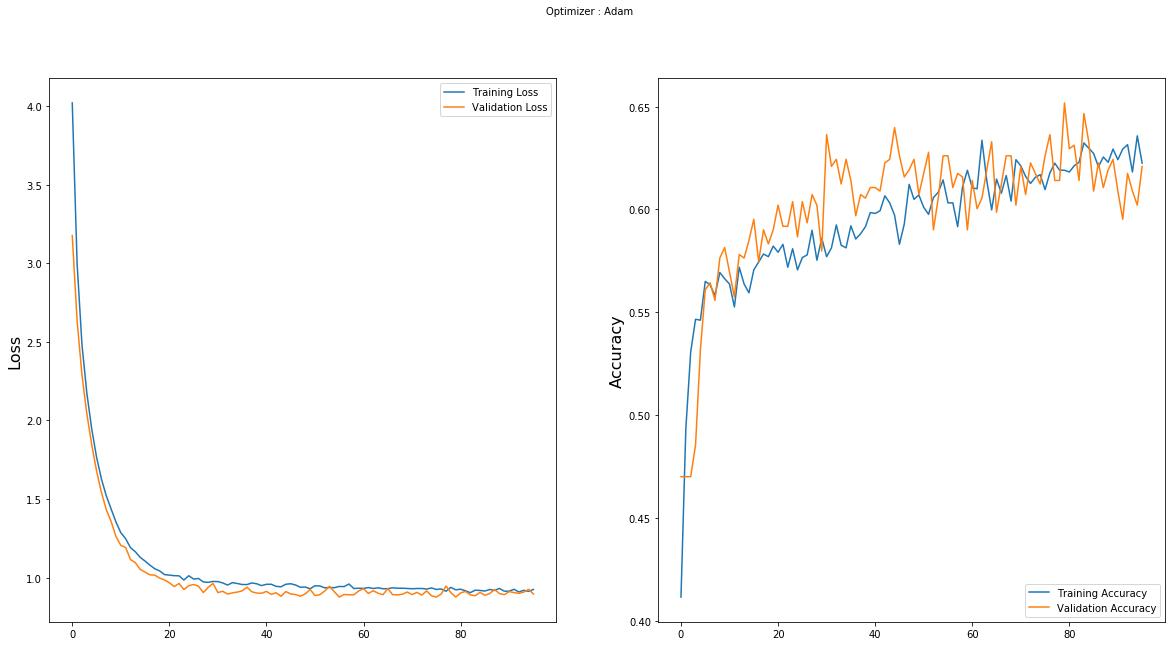

In [128]:
plotter_single(history_model_conditional_encoding)

In [ ]:
model_conditional_encoding_train = model_conditional_encoding(embedding_dim=200, E_T=E_T_200d)

# Define Fitting Parameters
VAL_SPLIT = 0.2


MAX_EPOCHS = 200
BATCH_SIZE = 32
VERBOSE = 1
SHUFFLE = True

# Call backs (Reduce LR on plateau and finally stop early and save best weights)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True, verbose=VERBOSE)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=10, verbose=VERBOSE, mode='auto')

CALLBACKS = [early_stopping]


history_model_conditional_encoding = model_conditional_encoding_train.fit(
                  x=[tweet_lines_pad, target_lines_pad],
                  y=stance_list,
                  validation_split=VAL_SPLIT,
                  epochs=MAX_EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=VERBOSE,
                  shuffle=SHUFFLE,
                  callbacks=CALLBACKS)

Epoch 1/200
38/73 [==============>...............] - ETA: 5s - loss: 5.3224 - accuracy: 0.3988

## Model #4: Model with bidirectional conditional encoding

In [ ]:
def model_bi_conditional_encoding(embedding_dim = 25, dropout_rate = 0.35, lambda_val = 0.003, E_T=E_T_25d):


  ##########################
  # Model Inputs
  ##########################

  # define two sets of inputs (Tweets, Target Topic)
  # Input for Tweets.
  inputTweet = Input(shape=(tweet_lines_pad.shape[1],))

  # Input for Target Topic.
  inputTarget = Input(shape=(target_lines_pad.shape[1],))

  # Initalize Embedding Paramaters
  word_embedding_dim = embedding_dim
  nb_words = vocab_size
  input_tweet_length = tweet_lines_pad.shape[1]
  input_target_length = target_lines_pad.shape[1]

  # Number of Neurons in RNN Layer.
  x_RNN_dim = 128
  y_RNN_dim = 128
  

  ##########################
  # First Branch (Target)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  x = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  x = Dropout(dropout_rate)(x)

  target_encoding = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding(x)



  ##########################
  # First Branch (Tweet)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  y = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  y = Dropout(dropout_rate)(y)

  tweet_encoder = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(x_RNN_dim,  
                                    return_sequences=False,
                                    return_state = True, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  (tweet_encoder, tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s) = tweet_encoder(y, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  ##########################
  # Second Branch (Tweet)
  ##########################

  # the first branch (model x), that operates on the first input (input target)
  a = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_target_length,
                      weights=[E_T],
                      trainable=False)(inputTarget)

  a = Dropout(dropout_rate)(a)

  target_encoding_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=False, 
                                    return_state = True,
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))

  (target_encoding_2, target_forward_h, target_forward_s,target_backward_h, target_backward_s) = target_encoding_2(a,initial_state=[tweet_forward_h, tweet_forward_s,tweet_backward_h, tweet_backward_s])



  ##########################
  # Second Branch (Target)
  ##########################

  # the second branch (model y), that operates on the second input (input target)
  b = Embedding(output_dim=word_embedding_dim,
                      input_dim=nb_words,
                      input_length=input_tweet_length,
                      weights=[E_T],
                      trainable=False)(inputTweet)

  b = Dropout(dropout_rate)(b)

  tweet_encoder_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(y_RNN_dim,  
                                    return_sequences=True,
                                    return_state = False, 
                                    kernel_regularizer=regularizers.l2(lambda_val),
                                    activity_regularizer=regularizers.l2(lambda_val),
                                    dropout=dropout_rate,
                                    recurrent_dropout=dropout_rate))


  final_encoder_out = tweet_encoder_2(b, initial_state=[target_forward_h, target_forward_s,target_backward_h, target_backward_s])


  attention_out = attention()(final_encoder_out)

  ##########################
  # FC and Final Layer
  ##########################

  FC_dim_1 = 256
  FC_dim_2 = 256
  FC_dim_3 = 128
  nb_classes = 3


  # apply a FC layer and then a softmax layer to predict the stance classes.
  z = Dense(FC_dim_1, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(attention_out)

  z = Dropout(dropout_rate)(z)

  z = Dense(FC_dim_2, activation="relu", kernel_regularizer=regularizers.l2(lambda_val))(z)

  z = Dropout(dropout_rate)(z)
    
  z = BatchNormalization()(z)

  z = Dense(nb_classes, activation="softmax")(z)



  ##########################
  # Model Building
  ##########################

  # Build combined model.
  model = Model(inputs=[inputTweet, inputTarget], outputs=z)

    ##########################
  # Model Compilation
  ##########################

  # Compile model
  lr = 0.0025
  optimizer = optimizers.Adam(lr=lr)
  model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  

  return model
